In [137]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from collections import Counter

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score,train_test_split,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, roc_auc_score,auc,roc_curve
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [13]:
train = pd.read_csv('churn-bigml-80.csv')

In [14]:
train.head(-5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
2657,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True
2658,IN,117,415,No,No,0,118.4,126,20.13,249.3,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True
2659,OH,78,408,No,No,0,193.4,99,32.88,116.9,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False


In [15]:
train["flag_muestra"] = "train"

In [16]:
train.head(-5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,train
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,train
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,train
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,train
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,...,16.69,120.1,133,5.40,9.7,4,2.62,4,True,train
2657,MD,62,408,No,No,0,321.1,105,54.59,265.5,...,22.57,180.5,72,8.12,11.5,2,3.11,4,True,train
2658,IN,117,415,No,No,0,118.4,126,20.13,249.3,...,21.19,227.0,56,10.22,13.6,3,3.67,5,True,train
2659,OH,78,408,No,No,0,193.4,99,32.88,116.9,...,9.94,243.3,109,10.95,9.3,4,2.51,2,False,train


In [18]:
test = pd.read_csv('churn-bigml-20.csv')

In [19]:
test["flag_muestra"] = "test"

In [20]:
test.head(-5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,test
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,19.42,208.8,111,9.40,12.7,6,3.43,4,True,test
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,27.01,160.6,128,7.23,5.4,9,1.46,4,True,test
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,11.67,189.6,105,8.53,7.7,6,2.08,2,False,test
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,18.28,178.7,90,8.04,11.1,1,3.00,1,False,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,AZ,48,415,No,Yes,27,141.1,109,23.99,224.7,...,19.10,174.3,122,7.84,13.2,2,3.56,1,False,test
658,KS,57,415,No,No,0,158.1,117,26.88,115.2,...,9.79,182.4,92,8.21,11.8,7,3.19,0,False,test
659,CA,127,510,No,No,0,107.9,128,18.34,187.0,...,15.90,218.5,95,9.83,0.0,0,0.00,0,False,test
660,IN,114,408,No,No,0,203.8,85,34.65,87.8,...,7.46,166.2,122,7.48,11.7,4,3.16,1,False,test


In [23]:
data = train._append(test)

In [24]:
data.head(-5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,train
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,train
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,train
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,train
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,AZ,48,415,No,Yes,27,141.1,109,23.99,224.7,...,19.10,174.3,122,7.84,13.2,2,3.56,1,False,test
658,KS,57,415,No,No,0,158.1,117,26.88,115.2,...,9.79,182.4,92,8.21,11.8,7,3.19,0,False,test
659,CA,127,510,No,No,0,107.9,128,18.34,187.0,...,15.90,218.5,95,9.83,0.0,0,0.00,0,False,test
660,IN,114,408,No,No,0,203.8,85,34.65,87.8,...,7.46,166.2,122,7.48,11.7,4,3.16,1,False,test


In [25]:
data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
flag_muestra               object
dtype: object

In [26]:
data['Area code'] = data['Area code'].astype(object)

In [27]:
data.dtypes

State                      object
Account length              int64
Area code                  object
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
flag_muestra               object
dtype: object

In [28]:
data['Total minutes'] = data['Total day minutes'] + data['Total eve minutes'] + data['Total night minutes'] + data['Total intl minutes']

In [29]:
data.head(-5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra,Total minutes
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,train,717.2
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,train,625.2
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,train,539.4
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,train,564.8
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,train,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,AZ,48,415,No,Yes,27,141.1,109,23.99,224.7,...,174.3,122,7.84,13.2,2,3.56,1,False,test,553.3
658,KS,57,415,No,No,0,158.1,117,26.88,115.2,...,182.4,92,8.21,11.8,7,3.19,0,False,test,467.5
659,CA,127,510,No,No,0,107.9,128,18.34,187.0,...,218.5,95,9.83,0.0,0,0.00,0,False,test,513.4
660,IN,114,408,No,No,0,203.8,85,34.65,87.8,...,166.2,122,7.48,11.7,4,3.16,1,False,test,469.5


In [30]:
total_calls = data['Total day calls'] + data['Total eve calls'] + data['Total night calls'] + data['Total intl calls']
data.insert(loc=len(data.columns), column='Total calls', value=total_calls)

In [32]:
data['Total charge'] = data['Total day charge'] + data['Total eve charge'] + data['Total night charge'] + data['Total intl charge']

In [34]:
data = data.rename(columns = {'International plan':'International_plan'})
data = data.rename(columns = {'Voice mail plan':'Voice_mail_plan'})

In [36]:
data['c_International_plan'] = LabelEncoder().fit_transform(data.International_plan.values)
data['c_Voice_mail_plan'] = LabelEncoder().fit_transform(data.Voice_mail_plan.values)

In [37]:
data.head(-5)

,State,Account length,Area code,International_plan,Voice_mail_plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra,Total minutes,Total calls,Total charge,c_International_plan,c_Voice_mail_plan
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,3,2.70,1,False,train,717.2,303,75.56,0,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,3,3.70,1,False,train,625.2,332,59.24,0,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,5,3.29,0,False,train,539.4,333,62.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,7,1.78,2,False,train,564.8,255,66.80,1,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,3,2.73,3,False,train,512.0,359,52.09,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,AZ,48,415,No,Yes,27,141.1,109,23.99,224.7,...,2,3.56,1,False,test,553.3,327,54.49,0,1
658,KS,57,415,No,No,0,158.1,117,26.88,115.2,...,7,3.19,0,False,test,467.5,365,48.07,0,0
659,CA,127,510,No,No,0,107.9,128,18.34,187.0,...,0,0.00,0,False,test,513.4,300,44.07,0,0
660,IN,114,408,No,No,0,203.8,85,34.65,87.8,...,4,3.16,1,False,test,469.5,321,52.75,0,0


In [44]:
ss.shapiro(data['Number vmail messages']),ss.shapiro(data['Total minutes']),ss.shapiro(data['Total charge']),ss.shapiro(data['Customer service calls'])

(ShapiroResult(statistic=0.6219369769096375, pvalue=0.0),
 ShapiroResult(statistic=0.999548614025116, pvalue=0.6626932621002197),
 ShapiroResult(statistic=0.9996581673622131, pvalue=0.8728287220001221),
 ShapiroResult(statistic=0.8767107725143433, pvalue=1.401298464324817e-45))

#### Conclusión: 
Con una confianza del 95%, las variables 'Number vmail messages' y 'Customer service calls'
no se aproximan a una distribución normal, pues el pvalor < 5%

Con una confianza del 95%, las variables 'Total minutes' y 'Total charge'
se aproximan a una distribución normal, pues el pvalor > 5%

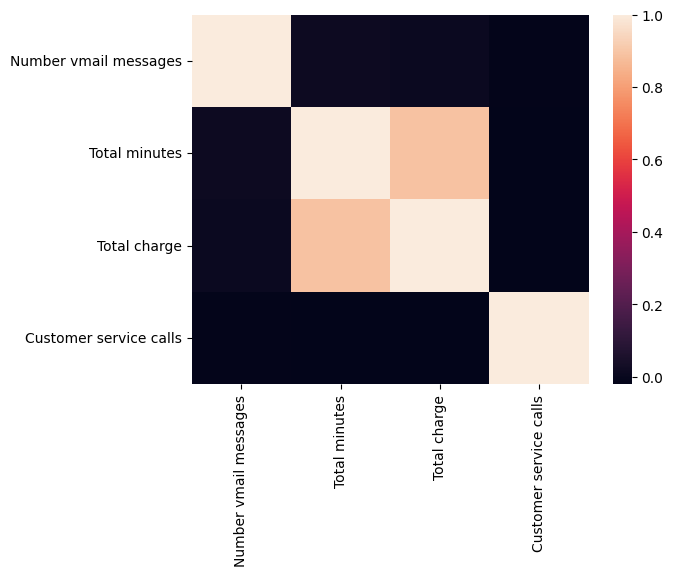

In [45]:
sns.heatmap(data.loc[:,['Number vmail messages','Total minutes','Total charge','Customer service calls']].corr(method = "pearson"))
plt.show()

In [46]:
data.loc[:,['Number vmail messages','Total minutes','Total charge','Customer service calls']].corr(method = "pearson")

,Number vmail messages,Total minutes,Total charge,Customer service calls
Number vmail messages,1.000000,0.014779,0.009766,-0.013263
Total minutes,0.014779,1.000000,0.890804,-0.020969
Total charge,0.009766,0.890804,1.000000,-0.019873
Customer service calls,-0.013263,-0.020969,-0.019873,1.000000


#### Prueba de Correlación
- Ho: no existe correlación entre las variables
- Ha: existe correlación entre las variables

In [47]:
ss.pearsonr(data['Total minutes'],data['Total charge'])

#Con un nivel de confianza del 95%, se rechaza la Ho, pues el pvalor < 5%,
#se concluye que las variables 'Total minutes' y 'Total charge' están correlacionadas
#Por otro lado, el grado de correlación entres las variables es de 0.890804470503018

PearsonRResult(statistic=0.8908044705030175, pvalue=0.0)

In [48]:
data['Churn'] = data['Churn'].astype('int64')

In [50]:
100*data['Churn'].value_counts(normalize=True)

Churn
0    85.508551
1    14.491449
Name: proportion, dtype: float64

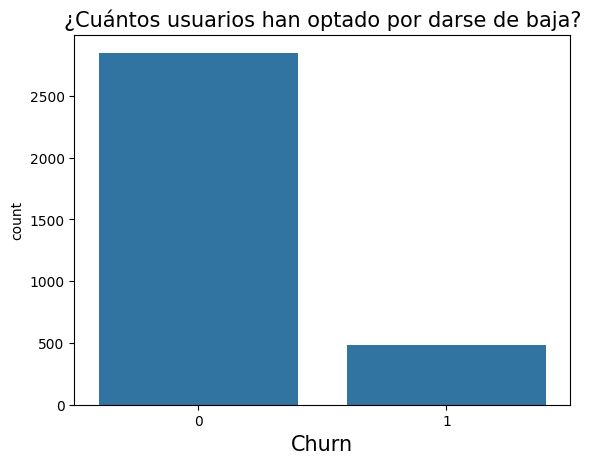

In [51]:
sns.countplot(data = data, x = 'Churn')
plt.xlabel('Churn', fontsize = 15)
plt.title('¿Cuántos usuarios han optado por darse de baja?', fontsize = 15)
plt.show()

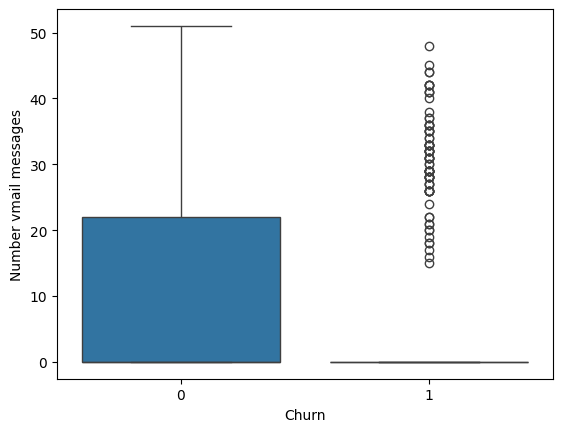

In [52]:
sns.boxplot(x='Churn',y='Number vmail messages',data=data)
plt.show()

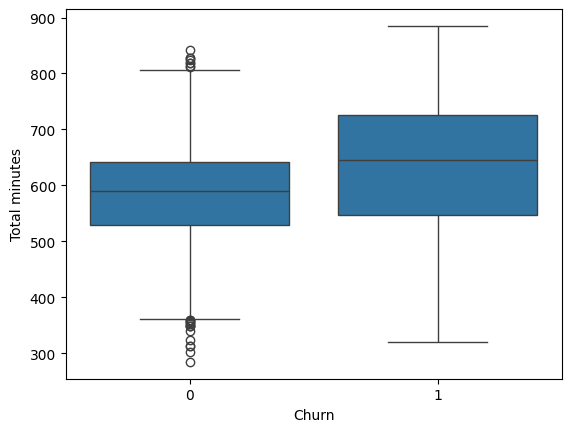

In [53]:
sns.boxplot(x='Churn',y='Total minutes',data=data)
plt.show()

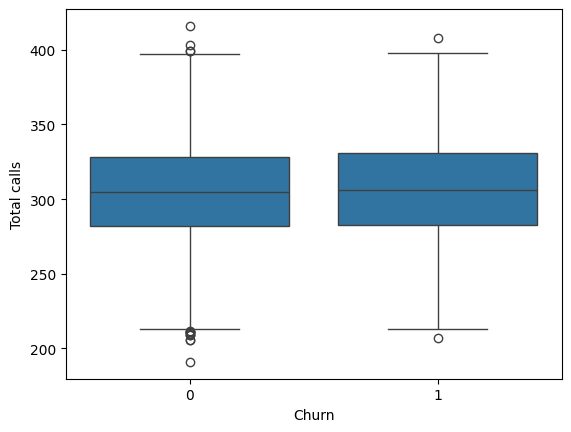

In [54]:
sns.boxplot(x='Churn',y='Total calls',data=data)
plt.show()

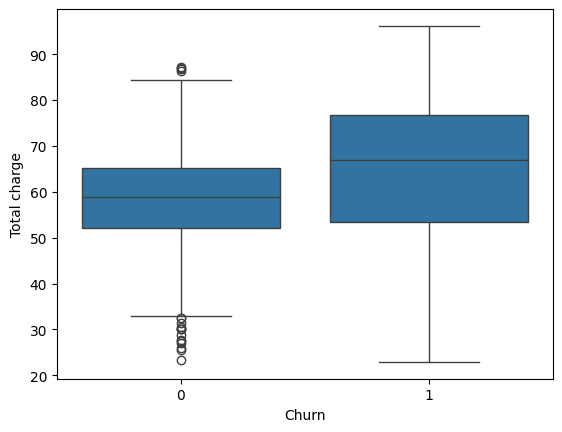

In [55]:
sns.boxplot(x='Churn',y='Total charge',data=data)
plt.show()

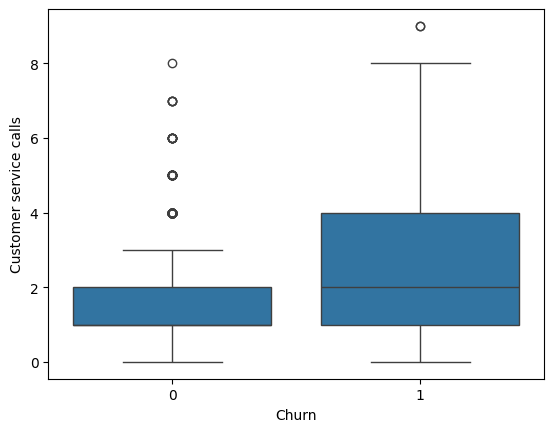

In [56]:
sns.boxplot(x='Churn',y='Customer service calls',data=data)
plt.show()

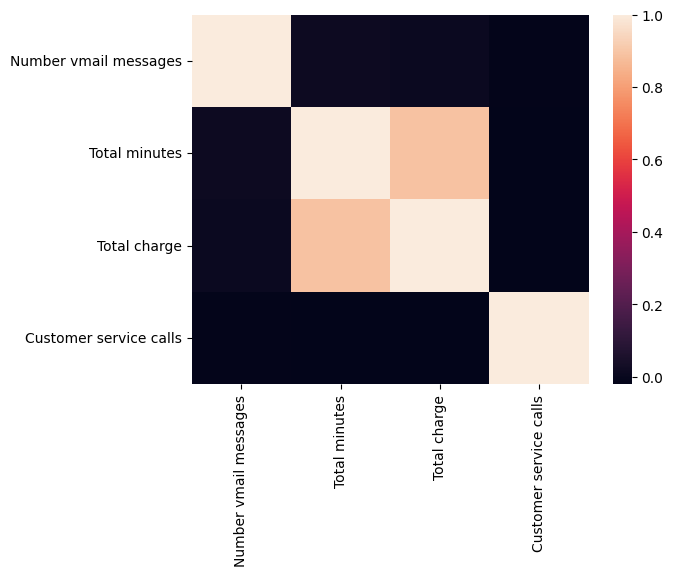

In [83]:
sns.heatmap(data.loc[:,['Number vmail messages','Total minutes','Total charge','Customer service calls']].corr(method = "pearson"))
plt.show()

In [84]:
data.loc[:,['Number vmail messages','Total minutes','Total charge','Customer service calls']].corr(method = "pearson")

,Number vmail messages,Total minutes,Total charge,Customer service calls
Number vmail messages,1.000000,0.014779,0.009766,-0.013263
Total minutes,0.014779,1.000000,0.890804,-0.020969
Total charge,0.009766,0.890804,1.000000,-0.019873
Customer service calls,-0.013263,-0.020969,-0.019873,1.000000


In [64]:
X = data[['c_International_plan','c_Voice_mail_plan','Number vmail messages','Total minutes','Total charge','Customer service calls']]
y = data['Churn']

In [65]:
X[0:5]

,c_International_plan,c_Voice_mail_plan,Number vmail messages,Total minutes,Total charge,Customer service calls
0,0,1,25,717.2,75.56,1
1,0,1,26,625.2,59.24,1
2,0,0,0,539.4,62.29,0
3,1,0,0,564.8,66.80,2
4,1,0,0,512.0,52.09,3


In [66]:
X = X.to_numpy()
X[0:5]

array([[  0.  ,   1.  ,  25.  , 717.2 ,  75.56,   1.  ],
       [  0.  ,   1.  ,  26.  , 625.2 ,  59.24,   1.  ],
       [  0.  ,   0.  ,   0.  , 539.4 ,  62.29,   0.  ],
       [  1.  ,   0.  ,   0.  , 564.8 ,  66.8 ,   2.  ],
       [  1.  ,   0.  ,   0.  , 512.  ,  52.09,   3.  ]])

In [67]:
y = y.to_numpy()
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [68]:
print(Counter(y))

Counter({0: 2850, 1: 483})


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Extra

In [161]:
roc_auc_todo = []
false_positive_rate_todo =[]
true_positive_rate_todo = []
resultados = []
sc = StandardScaler()
sm = SMOTE(random_state=0)
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)

In [162]:
def evaluate_model(classifier, X_test, y_test, model_name):
  y_pred = classifier.predict(X_test)
  y_pred_prob = classifier.predict_proba(X_test)
  
  sensibilidad = recall_score(y_test, y_pred)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
  roc_auc = auc(false_positive_rate, true_positive_rate)
  gini = 2 * roc_auc - 1
  roc_auc_todo.append(roc_auc)
  false_positive_rate_todo.append(false_positive_rate)
  true_positive_rate_todo.append(true_positive_rate)
  
  return {
      'Modelo': model_name,
      'Sensibilidad': sensibilidad,
      'ROC': roc_auc,
      'GINI': gini
  }

# Base

In [ ]:
X_train_base = sc.fit_transform(X_train)
X_test_base = sc.transform(X_test)
classifier = SVC(kernel='rbf',C = 10,gamma = 2,probability=True).fit(X_train_base, y_train)
y_pred = classifier.predict(X_test_base)
classifier = RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=600).fit(X_train_base, y_train)
y_pred = classifier.predict(X_test_base)
classifier = GradientBoostingClassifier(max_depth=2, max_features='log2', n_estimators=300).fit(X_train_base, y_train)
y_pred = classifier.predict(X_test_base)

In [163]:
X_train_base = sc.fit_transform(X_train)
X_test_base = sc.transform(X_test)

In [164]:
classifier = SVC(kernel='rbf',C = 10,gamma = 2,probability=True).fit(X_train_base, y_train)
y_pred = classifier.predict(X_test_base)
resultados.append(evaluate_model(classifier, X_test_base, y_test, "SVM_Base"))

In [165]:
classifier = RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=600).fit(X_train_base, y_train)
y_pred = classifier.predict(X_test_base)
resultados.append(evaluate_model(classifier, X_test_base, y_test, "RF_Base"))

In [166]:
classifier = GradientBoostingClassifier(max_depth=2, max_features='log2', n_estimators=300).fit(X_train_base, y_train)
y_pred = classifier.predict(X_test_base)
resultados.append(evaluate_model(classifier, X_test_base, y_test, "Bo_Base"))

# SMOTE

In [167]:
X_train_smote = sc.fit_transform(X_train)
X_test_smote = sc.transform(X_test)
X_train_smote, y_train_smote = sm.fit_resample(X_train_smote, y_train)

In [168]:
classifier = SVC(kernel='rbf',C = 10,gamma = 2,probability=True).fit(X_train_smote, y_train_smote)
y_pred = classifier.predict(X_test_smote)
resultados.append(evaluate_model(classifier, X_test_smote, y_test, "SVM_SMOTE"))

In [169]:
classifier = RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=600).fit(X_train_smote, y_train_smote)
y_pred = classifier.predict(X_test_smote)
resultados.append(evaluate_model(classifier, X_test_smote, y_test, "RF_SMOTE"))

In [170]:
classifier = GradientBoostingClassifier(max_depth=2, max_features='log2', n_estimators=300).fit(X_train_smote, y_train_smote)
y_pred = classifier.predict(X_test_smote)
resultados.append(evaluate_model(classifier, X_test_smote, y_test, "Bo_SMOTE"))

# OVER

In [171]:
X_train_oversamplig, y_train_oversampling = ros.fit_resample(X_train, y_train)
X_train_oversamplig = sc.fit_transform(X_train_oversamplig)
X_test_oversamplig = sc.transform(X_test)

In [172]:
classifier = SVC(kernel='rbf',C = 10,gamma = 2,probability=True).fit(X_train_oversamplig, y_train_oversampling)
y_pred = classifier.predict(X_test_oversamplig)
resultados.append(evaluate_model(classifier, X_test_oversamplig, y_test, "SVM_Oversampling"))

In [173]:
classifier = RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=600).fit(X_train_oversamplig, y_train_oversampling)
y_pred = classifier.predict(X_test_oversamplig)
resultados.append(evaluate_model(classifier, X_test_oversamplig, y_test, "RF_Oversampling"))

In [174]:
classifier = GradientBoostingClassifier(max_depth=2, max_features='log2', n_estimators=300).fit(X_train_oversamplig, y_train_oversampling)
y_pred = classifier.predict(X_test_oversamplig)
resultados.append(evaluate_model(classifier, X_test_oversamplig, y_test, "Bo_Oversampling"))

# UNDER

In [175]:
X_train_undersampling, y_train_undersampling = rus.fit_resample(X_train, y_train)
X_train_undersampling = sc.fit_transform(X_train_undersampling)
X_test_undersampling = sc.transform(X_test)

In [176]:
classifier = SVC(kernel='rbf',C = 10,gamma = 2,probability=True).fit(X_train_undersampling, y_train_undersampling)
y_pred = classifier.predict(X_test_undersampling)
resultados.append(evaluate_model(classifier, X_test_undersampling, y_test, "SVM_Undersampling"))

In [177]:
classifier = RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=600).fit(X_train_undersampling, y_train_undersampling)
y_pred = classifier.predict(X_test_undersampling)
resultados.append(evaluate_model(classifier, X_test_undersampling, y_test, "RF_Undersampling"))

In [178]:
classifier = GradientBoostingClassifier(max_depth=2, max_features='log2', n_estimators=300).fit(X_train_undersampling, y_train_undersampling)
y_pred = classifier.predict(X_test_undersampling)
resultados.append(evaluate_model(classifier, X_test_undersampling, y_test, "Bo_Undersampling"))

In [182]:
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

               Modelo  Sensibilidad       ROC      GINI
0            SVM_Base      0.688172  0.861920  0.723839
1             RF_Base      0.688172  0.919673  0.839347
2             Bo_Base      0.698925  0.913866  0.827732
3           SVM_SMOTE      0.774194  0.900079  0.800157
4            RF_SMOTE      0.870968  0.927035  0.854071
5            Bo_SMOTE      0.860215  0.924347  0.848694
6    SVM_Oversampling      0.774194  0.903994  0.807988
7     RF_Oversampling      0.870968  0.916994  0.833989
8     Bo_Oversampling      0.860215  0.922998  0.845997
9   SVM_Undersampling      0.838710  0.882507  0.765014
10   RF_Undersampling      0.870968  0.921809  0.843618
11   Bo_Undersampling      0.870968  0.910082  0.820164


In [183]:
df_resultados.to_csv('resultados.csv', index=False)


roc_auc_todo = []
false_positive_rate_todo =[]
true_positive_rate_todo = []

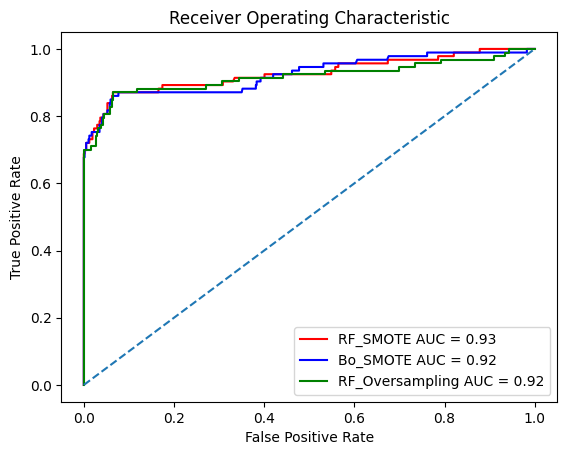

In [188]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_todo[4],true_positive_rate_todo[4], color='red',label = 'RF_SMOTE AUC = %0.2f' % roc_auc_todo[4])
plt.plot(false_positive_rate_todo[5],true_positive_rate_todo[5], color='blue',label = 'Bo_SMOTE AUC = %0.2f' % roc_auc_todo[5])
plt.plot(false_positive_rate_todo[7],true_positive_rate_todo[7], color='green',label = 'RF_Oversampling AUC = %0.2f' % roc_auc_todo[7])
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [189]:
def clasificar_valor(valor, quantiles):
    if valor <= quantiles[0]:
        return "Muy Bajo"
    elif valor <= quantiles[1]:
        return "Bajo"
    elif valor <= quantiles[2]:
        return "Medio"
    elif valor <= quantiles[3]:
        return "Alto"
    else:
        return "Muy alto"

In [202]:
def score2(df):
    deciles = df['Target_Pred_Prob_1'].quantile(q=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1]).tolist()
    quantiles = df['Target_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80]).tolist()
    total_1=(df['Target_Pred']==1).sum()
    total = df.shape[0]
    total_porcentaje = total_1/total
    LIFT=[]
    valor=[]
    for lif in deciles:
        LIFT.append(lif/total_porcentaje)
        valor.append(clasificar_valor(lif,quantiles))
    return LIFT,valor

In [191]:
RFclassifier = RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=600).fit(X_train_smote, y_train_smote)
y_pred_RF = RFclassifier.predict(X_test_smote)

In [194]:
y_pred_prob = RFclassifier.predict_proba(X_test_smote)

In [204]:
dataf = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred_RF),pd.DataFrame(y_pred_prob)],axis=1)

In [205]:
dataf.columns = ['1','2','3','4','5','6','Target','Target_Pred','Target_Pred_Prob_0','Target_Pred_Prob_1']

In [206]:
dataf

,1,2,3,4,5,6,Target,Target_Pred,Target_Pred_Prob_0,Target_Pred_Prob_1
0,0.0,0.0,0.0,558.2,52.57,1.0,0,0,0.754814,0.245186
1,0.0,1.0,28.0,504.6,56.14,3.0,0,0,0.775356,0.224644
2,0.0,1.0,35.0,627.4,66.73,0.0,0,0,0.766483,0.233517
3,0.0,0.0,0.0,673.7,70.43,4.0,0,0,0.630944,0.369056
4,0.0,1.0,30.0,687.2,64.55,0.0,0,0,0.829134,0.170866
...,...,...,...,...,...,...,...,...,...,...
662,0.0,0.0,0.0,490.7,38.29,1.0,0,0,0.776922,0.223078
663,0.0,0.0,0.0,570.0,49.61,1.0,0,0,0.758504,0.241496
664,0.0,0.0,0.0,519.9,41.43,2.0,0,0,0.775350,0.224650
665,1.0,0.0,0.0,338.9,36.36,0.0,0,1,0.389162,0.610838


In [207]:
Lift,score2=score2(dataf)
score2

['Muy Bajo',
 'Muy Bajo',
 'Bajo',
 'Bajo',
 'Medio',
 'Medio',
 'Alto',
 'Alto',
 'Muy alto',
 'Muy alto']

In [208]:
Lift

[0.9882108086856946,
 1.0269916819545675,
 1.0811616504221315,
 1.1439660549944906,
 1.208397733638471,
 1.2566259778937086,
 1.3297942084317897,
 2.1310773188012133,
 3.627438611845798,
 5.235920633606589]

In [216]:
freq = dataf.groupby(["Target_Pred"]).count()
print(freq)

               1    2    3    4    5    6  Target  Target_Pred_Prob_0  \
Target_Pred                                                             
0            543  543  543  543  543  543     543                 543   
1            124  124  124  124  124  124     124                 124   

             Target_Pred_Prob_1  
Target_Pred                      
0                           543  
1                           124  
